## INTRODUCTION

The objective of the project involves examining a given dataset that includes details about the voting patterns of different counties in the United States. The aim is to create and contrast three distinct prediction models. These models are intended to forecast whether a county will vote in favor or against the legalization of gaming via a ballot. The model also has different attributes but we need to eliminate the irrelevant ones so that we can end up with a model that has higher accuracy.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing as pre

Imported all the required columns for data reading, data cleaning, data manipulation, data visualization, model building and also for testing the accuracy of the model. We'll be usig pandas, numpy for Data Analysis; matplotlib and seaborn for data visualization

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/IS670_data/Gaming_Ballot_Dataset.csv")
df

,State No,County No,FOR,AGAINST,TOTAL CASTE,DEPENDENT VARIABLE,BALLOT TYPE,POPULATION,PCI,MEDIUM FAMILY INCOME,...,UNEMPLOYMENT RATE,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65,MSA,PERCENT MINORITY,NO OF OLDER,NO OF YOUNGER
0,1,1,42385,22992,65377,1,1,265038,"$15,607","$34,618",...,5.0,80600,22627,94724,46933,20154,1,0.25,67087,189448
1,1,2,2015,1852,3867,1,1,13617,"$13,740","$23,114",...,7.0,4285,1861,4092,2114,1265,2,0.40,3379,8184
2,1,3,51959,48406,100365,1,1,391511,"$24,187","$44,874",...,3.0,111243,29574,150740,70783,29171,1,0.15,99954,301480
3,1,4,957,856,1813,1,1,5345,"$12,816","$27,359",...,5.0,1647,229,1670,1178,621,2,0.26,1799,3340
4,1,5,942,1129,2071,0,1,4556,"$19,017","$23,054",...,1.0,1192,220,1231,973,940,2,0.07,1913,2462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,18,41,44069,27316,71385,1,1,354527,"$18,893","$27,622",...,15.6,124607,30781,100927,62657,35555,1,0.50,98212,201854
1283,18,42,10026,9755,19781,1,1,53029,"$20,082","$33,810",...,8.0,11972,3497,16099,12015,9446,2,0.13,21461,32198
1284,18,43,126397,76905,203302,1,1,732143,"$28,711","$49,763",...,5.6,208062,65744,235177,146412,76748,1,0.38,223160,470354
1285,18,44,26412,23464,49876,1,1,153293,"$25,791","$38,751",...,5.4,39727,23948,46570,27627,15421,1,0.35,43048,93140


We have now imported the dataset "Gaming_Ballot" and have viewed the first five rows of the dataset.

In [ ]:
df.shape

(1287, 31)

The dataset contains 1287 rows and 32 columns

In [ ]:
df.describe()

,State No,County No,FOR,AGAINST,TOTAL CASTE,DEPENDENT VARIABLE,BALLOT TYPE,POPULATION,SIZE OF COUNTY,POPULATION DENSITY,...,UNEMPLOYMENT RATE,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65,MSA,PERCENT MINORITY,NO OF OLDER,NO OF YOUNGER
count,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1287.000000,1287.000000,...,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000
mean,10.399378,57.271950,6460.944056,7330.511267,13791.455322,0.425796,1.542347,5.247528e+04,1000.487801,81.573497,...,6.050505,14419.316239,5204.804973,16497.122766,10298.944833,6754.410256,1.781663,0.195602,17053.355089,32994.245532
std,5.047112,54.349102,14766.945874,15099.602719,28431.805279,0.494655,0.498397,1.097376e+05,778.794180,221.758540,...,3.410285,30487.082118,11700.168130,37260.003718,20948.274331,13508.404172,0.413278,0.189275,34050.346392,74520.007437
min,1.000000,1.000000,44.000000,15.000000,59.000000,0.000000,1.000000,3.270000e+02,120.800000,0.300000,...,0.600000,87.000000,16.000000,108.000000,71.000000,21.000000,1.000000,0.000000,92.000000,216.000000
25%,8.000000,20.000000,812.000000,908.500000,1818.000000,0.000000,1.000000,6.541500e+03,534.250000,7.025000,...,3.600000,1790.500000,417.500000,1717.000000,1328.500000,1106.500000,2.000000,0.040000,2429.000000,3434.000000
50%,10.000000,41.000000,1847.000000,2017.000000,3989.000000,0.000000,2.000000,1.612600e+04,832.500000,22.600000,...,5.400000,4568.000000,1302.000000,4520.000000,3287.000000,2401.000000,2.000000,0.140000,5772.000000,9040.000000
75%,15.000000,70.000000,4669.500000,6013.500000,10767.500000,1.000000,2.000000,4.313700e+04,1140.450000,64.865000,...,7.600000,12004.000000,4119.000000,12577.500000,8947.000000,5813.500000,2.000000,0.300000,14977.000000,25155.000000
max,18.000000,251.000000,161415.000000,121925.000000,245523.000000,1.000000,2.000000,1.206243e+06,6347.800000,3404.480000,...,38.500000,353009.000000,137916.000000,437537.000000,202133.000000,122335.000000,2.000000,0.970000,324468.000000,875074.000000


df.describe explains the standard deviation, minimum, maximum and mean of the numerical dataset. It helps to understand the spread of the numerical data. So, with that information we can basically determine whetehr we need to normalize the attribute value or not.

## DATA CLEANING

In [ ]:
df.isnull().sum()

State No                                0
County No                               0
FOR                                     0
AGAINST                                 0
TOTAL CASTE                             0
DEPENDENT VARIABLE                      0
BALLOT TYPE                             0
POPULATION                              0
PCI                                     0
MEDIUM FAMILY INCOME                    0
SIZE OF COUNTY                          0
POPULATION DENSITY                      0
PERCENT WHITE                           0
PERCENT BLACK                           0
PERCENT OTHER                           0
PERCENT MALE                            0
PERCENT FEMALE                          0
NO OF CHURCHES                          0
NO OF CHURCH MEMBERS                    1
PERCENT CHURCH MEMBERS OF POPULATION    1
POVERTY LEVEL                           0
UNEMPLOYMENT RATE                       0
AGE LESS THAN 18                        0
AGE24                             

The dataset contains null values for one row and it is for the columns "NO OF CHURCH MEMBERS" and "PERCENT CHURCH MEMBERS OF POPULATIONS", so we'll try to remove that row from the dataset instead of replacing it with a particular statistical calculation.

In [ ]:
df=df.dropna(axis=0)

We will drop the row where there is null value, since it has only one row that has null value.

In [ ]:
df.isnull().sum()

State No                                0
County No                               0
FOR                                     0
AGAINST                                 0
TOTAL CASTE                             0
DEPENDENT VARIABLE                      0
BALLOT TYPE                             0
POPULATION                              0
PCI                                     0
MEDIUM FAMILY INCOME                    0
SIZE OF COUNTY                          0
POPULATION DENSITY                      0
PERCENT WHITE                           0
PERCENT BLACK                           0
PERCENT OTHER                           0
PERCENT MALE                            0
PERCENT FEMALE                          0
NO OF CHURCHES                          0
NO OF CHURCH MEMBERS                    0
PERCENT CHURCH MEMBERS OF POPULATION    0
POVERTY LEVEL                           0
UNEMPLOYMENT RATE                       0
AGE LESS THAN 18                        0
AGE24                             

In [ ]:
df.dtypes

State No                                  int64
County No                                 int64
FOR                                       int64
AGAINST                                   int64
TOTAL CASTE                               int64
DEPENDENT VARIABLE                        int64
BALLOT TYPE                               int64
POPULATION                                int64
PCI                                      object
MEDIUM FAMILY INCOME                     object
SIZE OF COUNTY                          float64
POPULATION DENSITY                      float64
PERCENT WHITE                           float64
PERCENT BLACK                           float64
PERCENT OTHER                           float64
PERCENT MALE                            float64
PERCENT FEMALE                          float64
NO OF CHURCHES                            int64
NO OF CHURCH MEMBERS                    float64
PERCENT CHURCH MEMBERS OF POPULATION    float64
POVERTY LEVEL                           

We'll examine two attribute which are identified as "Object" data type. Our goal is to determine if we can convert them into numerical data types by eliminating characters like "$" and "," and transforming them into numerical features suitable for training machine learning models.

In [ ]:
df['PCI']=df['PCI'].str.replace('$',' ')
df['PCI']=df['PCI'].str.replace(',','')
df['MEDIUM FAMILY INCOME']=df['MEDIUM FAMILY INCOME'].str.replace('$',' ')
df['MEDIUM FAMILY INCOME']=df['MEDIUM FAMILY INCOME'].str.replace(',','')
df['MEDIUM FAMILY INCOME']=df['MEDIUM FAMILY INCOME'].astype('int')
df['PCI']=df['PCI'].astype('int')

<ipython-input-541-06cd78e4fa9c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['PCI']=df['PCI'].str.replace('$',' ')
<ipython-input-541-06cd78e4fa9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCI']=df['PCI'].str.replace('$',' ')
<ipython-input-541-06cd78e4fa9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCI']=df['PCI'].str.re

We have replaced the '$',  ',' so that we can then convert it into numerical datatype.

In [ ]:
df.columns

Index(['State No', 'County No', 'FOR', 'AGAINST', 'TOTAL CASTE',
       'DEPENDENT VARIABLE', 'BALLOT TYPE', 'POPULATION', 'PCI',
       'MEDIUM FAMILY INCOME', 'SIZE OF COUNTY', 'POPULATION DENSITY',
       'PERCENT WHITE', 'PERCENT BLACK', 'PERCENT OTHER', 'PERCENT MALE',
       'PERCENT FEMALE', 'NO OF CHURCHES', 'NO OF CHURCH MEMBERS',
       'PERCENT CHURCH MEMBERS OF POPULATION', 'POVERTY LEVEL',
       'UNEMPLOYMENT RATE', 'AGE LESS THAN 18', 'AGE24', 'AGE44', 'AGE64',
       'AGE OLDER THAN 65', 'MSA', 'PERCENT MINORITY', 'NO OF OLDER',
       'NO OF YOUNGER'],
      dtype='object')

In [ ]:
df.dtypes

State No                                  int64
County No                                 int64
FOR                                       int64
AGAINST                                   int64
TOTAL CASTE                               int64
DEPENDENT VARIABLE                        int64
BALLOT TYPE                               int64
POPULATION                                int64
PCI                                       int64
MEDIUM FAMILY INCOME                      int64
SIZE OF COUNTY                          float64
POPULATION DENSITY                      float64
PERCENT WHITE                           float64
PERCENT BLACK                           float64
PERCENT OTHER                           float64
PERCENT MALE                            float64
PERCENT FEMALE                          float64
NO OF CHURCHES                            int64
NO OF CHURCH MEMBERS                    float64
PERCENT CHURCH MEMBERS OF POPULATION    float64
POVERTY LEVEL                           

In [ ]:
df['DEPENDENT VARIABLE'].value_counts()

0    739
1    547
Name: DEPENDENT VARIABLE, dtype: int64

In [ ]:
df['Vote_Percentage']=(df['TOTAL CASTE']/df['POPULATION'])*100
df['Vote_Percentage']

<ipython-input-545-9ecfa17b9002>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vote_Percentage']=(df['TOTAL CASTE']/df['POPULATION'])*100


0       24.667029
1       28.398326
2       25.635295
3       33.919551
4       45.456541
          ...    
1282    20.135279
1283    37.302231
1284    27.768073
1285    32.536385
1286    22.334162
Name: Vote_Percentage, Length: 1286, dtype: float64

## DATA VISUALIZATION

In [ ]:
groupdata=df.groupby('State No')['AGAINST'].sum()
state=groupdata.index
against_val=groupdata.values
groupdata

State No
1      427996
2      263031
3      155534
4       80122
5      685507
6        2596
7      699373
8     1572651
9      530588
10    1629715
11     207607
12       3761
13     147680
14     267928
15     417586
16     304756
17    1035221
18    1002701
Name: AGAINST, dtype: int64

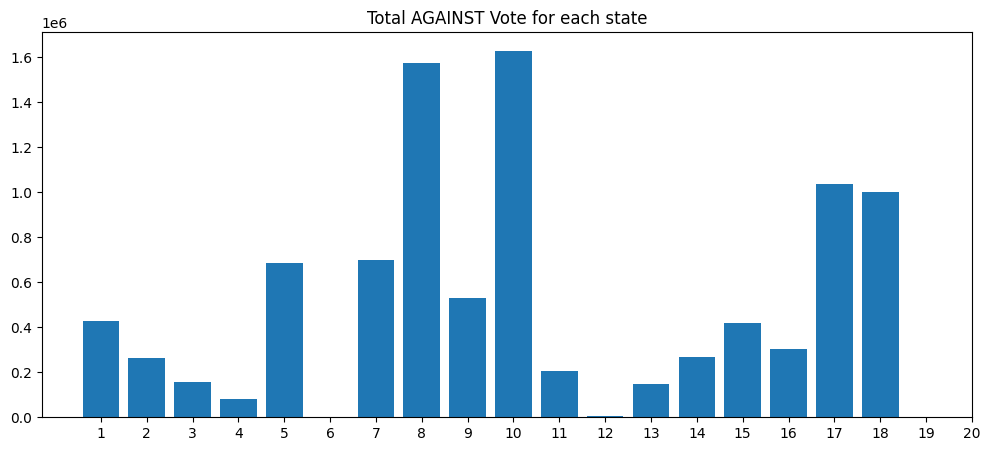

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(state, against_val)
vals=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(vals)
plt.title("Total AGAINST Vote for each state")
plt.show()

The bar chart displays the State which voted the total number of "AGAINST" vote. SO that we can make the necessary decisions.

In [ ]:
groupdata1=df.groupby('State No')['FOR'].sum()
states=groupdata1.index
against_vals=groupdata1.values
groupdata1

State No
1      554520
2      689683
3       73649
4       36074
5      255015
6        1802
7      523256
8      816207
9      897074
10     971847
11     122298
12       2850
13     165185
14     440973
15     280152
16     139128
17    1130462
18    1215016
Name: FOR, dtype: int64

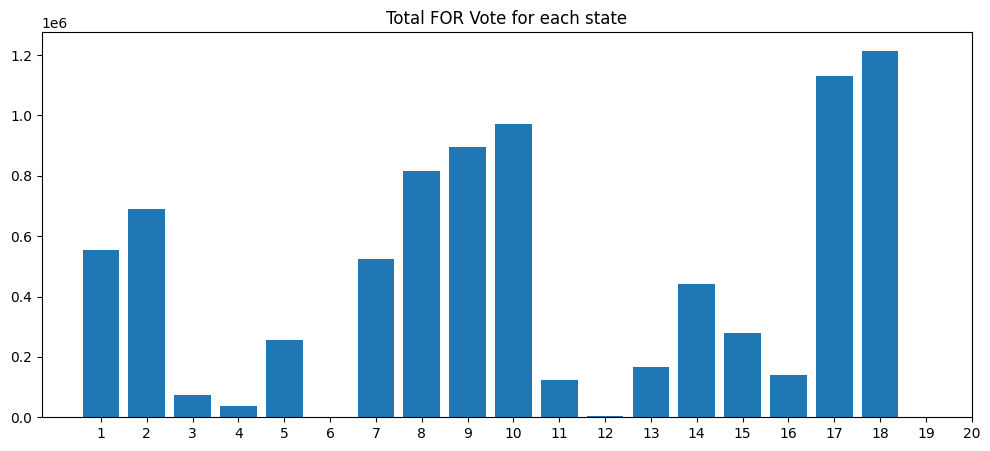

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(states, against_vals)
vals=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(vals)
plt.title("Total FOR Vote for each state")
plt.show()

The bar chart displays the State which voted the total number of "FOR" vote. SO that we can make the necessary decisions.

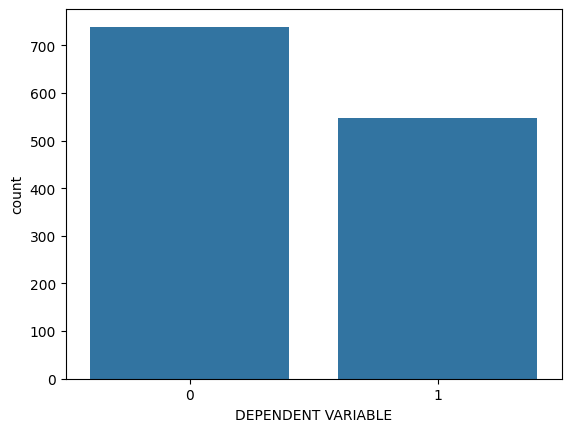

In [ ]:
import seaborn as sns
sns.countplot(x='DEPENDENT VARIABLE', data=df)
plt.show()

The chart basically explains the vote count of "Yes" and "No", which can help us in determining whether we need to balance the data ot not.

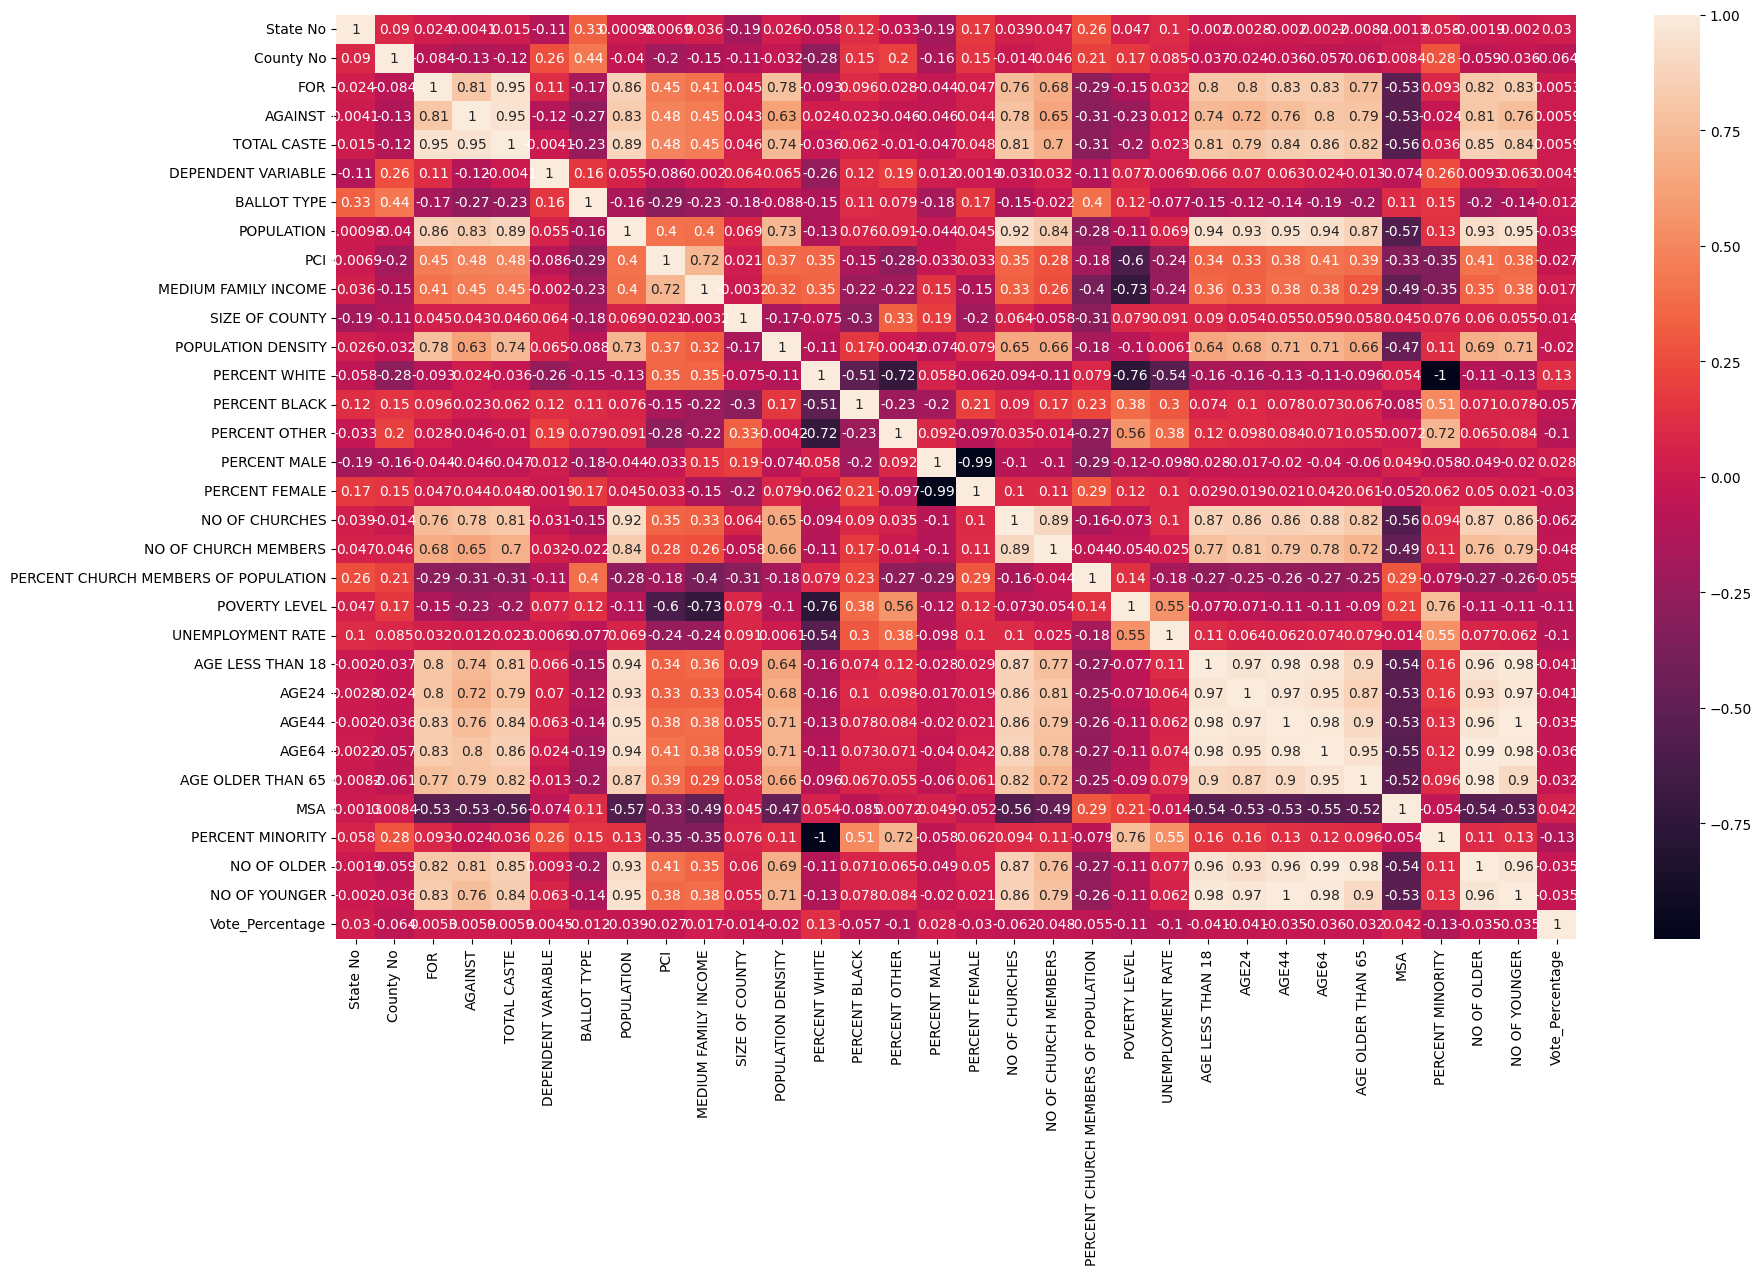

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

The heat map helps us in getting the correlation score of the independent variable to the dependent variable. SO, that we can deteremine what variable which variable be provided to the model so that we can provide a higher accuracy model.

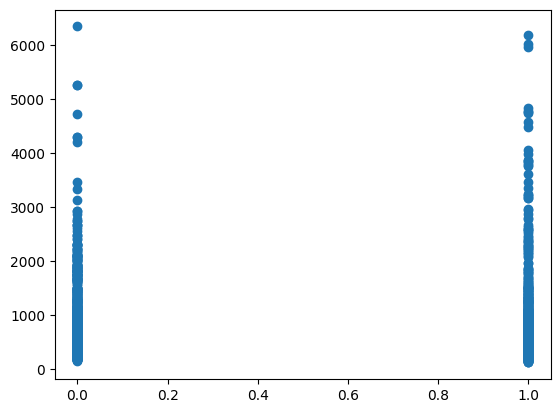

In [ ]:
plt.scatter(df['DEPENDENT VARIABLE'], df['SIZE OF COUNTY'])
plt.show()

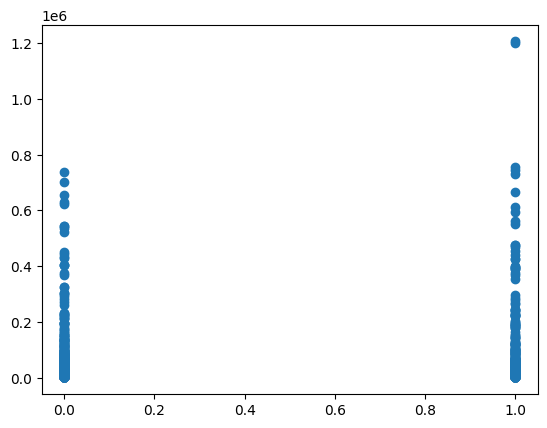

In [ ]:
plt.scatter(df['DEPENDENT VARIABLE'], df['POPULATION'])
plt.show()

In [ ]:
df['MSA'].unique()

array([1, 2])

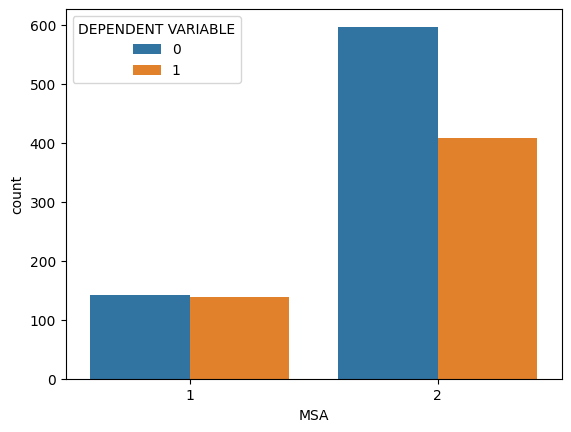

In [ ]:
sns.countplot(x=df['MSA'],hue=df['DEPENDENT VARIABLE'])
plt.show()

In [ ]:
df.columns

Index(['State No', 'County No', 'FOR', 'AGAINST', 'TOTAL CASTE',
       'DEPENDENT VARIABLE', 'BALLOT TYPE', 'POPULATION', 'PCI',
       'MEDIUM FAMILY INCOME', 'SIZE OF COUNTY', 'POPULATION DENSITY',
       'PERCENT WHITE', 'PERCENT BLACK', 'PERCENT OTHER', 'PERCENT MALE',
       'PERCENT FEMALE', 'NO OF CHURCHES', 'NO OF CHURCH MEMBERS',
       'PERCENT CHURCH MEMBERS OF POPULATION', 'POVERTY LEVEL',
       'UNEMPLOYMENT RATE', 'AGE LESS THAN 18', 'AGE24', 'AGE44', 'AGE64',
       'AGE OLDER THAN 65', 'MSA', 'PERCENT MINORITY', 'NO OF OLDER',
       'NO OF YOUNGER', 'Vote_Percentage'],
      dtype='object')

Countplot are useful for showing the number of times each category appears in your dataset. The Countplot above shows the same thing, it shows the count of MSA for dependent variables.

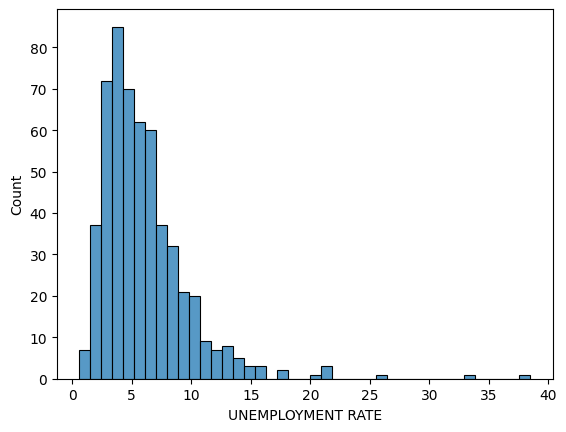

In [ ]:
df_yes=df[df['DEPENDENT VARIABLE']==1]
sns.histplot(x='UNEMPLOYMENT RATE',data=df_yes)
plt.show()

The histogram above displays the distribution of the unemployment rate for the counties which have voted "YES" for legalizing the gaming.

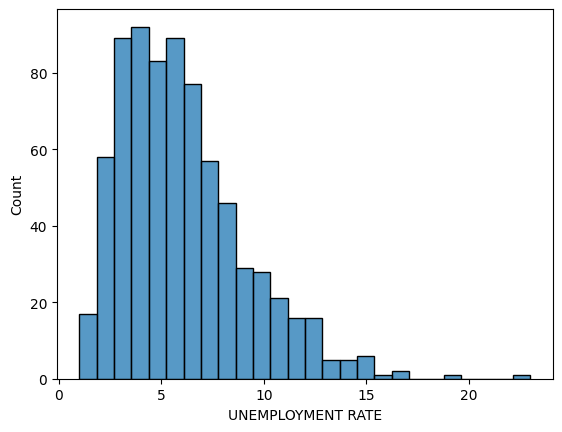

In [ ]:
df_yes=df[df['DEPENDENT VARIABLE']==0]
sns.histplot(x='UNEMPLOYMENT RATE',data=df_yes)
plt.show()

The histogram above displays the distribution of the unemployment rate for the counties which have voted "NO" for legalizing the gaming.

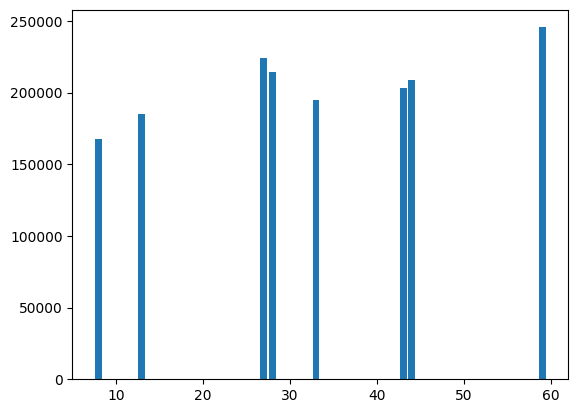

In [ ]:
df_topcaste=df.sort_values(by=['TOTAL CASTE'],ascending=False).head(10)
plt.bar(df_topcaste['County No'],df_topcaste['TOTAL CASTE'])
plt.show()

The bar chart displays the top 10 counties which have the highest total casted vote. The reason behind displaying the bar chart is that we can determine which counties have the highest number of total vote cast, so that we can focus more on that particular counties.

## MODEL BUILDING

We'll be using scikit learn to train and build machine learning model such as DecisionTree Classifier, Naive Bayes and KNN.

In [ ]:
df.columns

Index(['State No', 'County No', 'FOR', 'AGAINST', 'TOTAL CASTE',
       'DEPENDENT VARIABLE', 'BALLOT TYPE', 'POPULATION', 'PCI',
       'MEDIUM FAMILY INCOME', 'SIZE OF COUNTY', 'POPULATION DENSITY',
       'PERCENT WHITE', 'PERCENT BLACK', 'PERCENT OTHER', 'PERCENT MALE',
       'PERCENT FEMALE', 'NO OF CHURCHES', 'NO OF CHURCH MEMBERS',
       'PERCENT CHURCH MEMBERS OF POPULATION', 'POVERTY LEVEL',
       'UNEMPLOYMENT RATE', 'AGE LESS THAN 18', 'AGE24', 'AGE44', 'AGE64',
       'AGE OLDER THAN 65', 'MSA', 'PERCENT MINORITY', 'NO OF OLDER',
       'NO OF YOUNGER', 'Vote_Percentage'],
      dtype='object')

In [ ]:
x=df[[ 'FOR', 'AGAINST', 'TOTAL CASTE', 'BALLOT TYPE', 'SIZE OF COUNTY', 'POPULATION DENSITY',
       'PERCENT WHITE', 'PERCENT BLACK', 'PERCENT OTHER', 'PERCENT MALE',
       'PERCENT FEMALE', 'NO OF CHURCHES', 'POVERTY LEVEL',
       'UNEMPLOYMENT RATE',  'MSA', 'PERCENT MINORITY', 'NO OF OLDER',
       'NO OF YOUNGER', 'Vote_Percentage']]
y=df['DEPENDENT VARIABLE']

We will drop some columns which are:

State No, County No: We can drop this columns, as this columns has no significance since they are just index value.

AGE LESS THAN 18, AGE24,AGE44, AGE64, AGE OLDER THAN 65: It is clearly evident from the correlation map, that most of the attribute have a low correlation score. Here, the given attributes can be explained with the help of "NO OF OLDER" and "NO OF YOUNGER", so it is better to drop those column so that we can reduce as much we can
NO OF CHURCH MEMBERS: There will be counties which would have higher population so it is understandable that they would have no. of church members, so it wont be justifiable. In such situation, it will be better that we drop columns that are similar to other columns, so that we can build a model with higher accuracy.

POPULATION: It is better to consider "POPULATION DENSITY" instead of "POPULATION"

PCI, MEDIUM FAMILY INCOME: These attributes were also not relevant.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(900, 19) (386, 19) (900,) (386,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 5)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

[Text(0.4625, 0.9166666666666666, 'AGAINST <= 823.5\nentropy = 0.978\nsamples = 900\nvalue = [529, 371]'),
 Text(0.3, 0.75, 'FOR <= 689.0\nentropy = 0.911\nsamples = 184\nvalue = [60, 124]'),
 Text(0.25, 0.5833333333333334, 'AGAINST <= 564.0\nentropy = 1.0\nsamples = 120\nvalue = [60, 60]'),
 Text(0.2, 0.4166666666666667, 'FOR <= 386.5\nentropy = 0.932\nsamples = 92\nvalue = [32, 60]'),
 Text(0.1, 0.25, 'AGAINST <= 259.5\nentropy = 0.994\nsamples = 55\nvalue = [30, 25]'),
 Text(0.05, 0.08333333333333333, 'entropy = 0.592\nsamples = 28\nvalue = [4, 24]'),
 Text(0.15, 0.08333333333333333, 'entropy = 0.229\nsamples = 27\nvalue = [26, 1]'),
 Text(0.3, 0.25, 'PERCENT WHITE <= 0.995\nentropy = 0.303\nsamples = 37\nvalue = [2, 35]'),
 Text(0.25, 0.08333333333333333, 'entropy = 0.183\nsamples = 36\nvalue = [1, 35]'),
 Text(0.35, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.4166666666666667, 'entropy = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(0.35, 0.58333

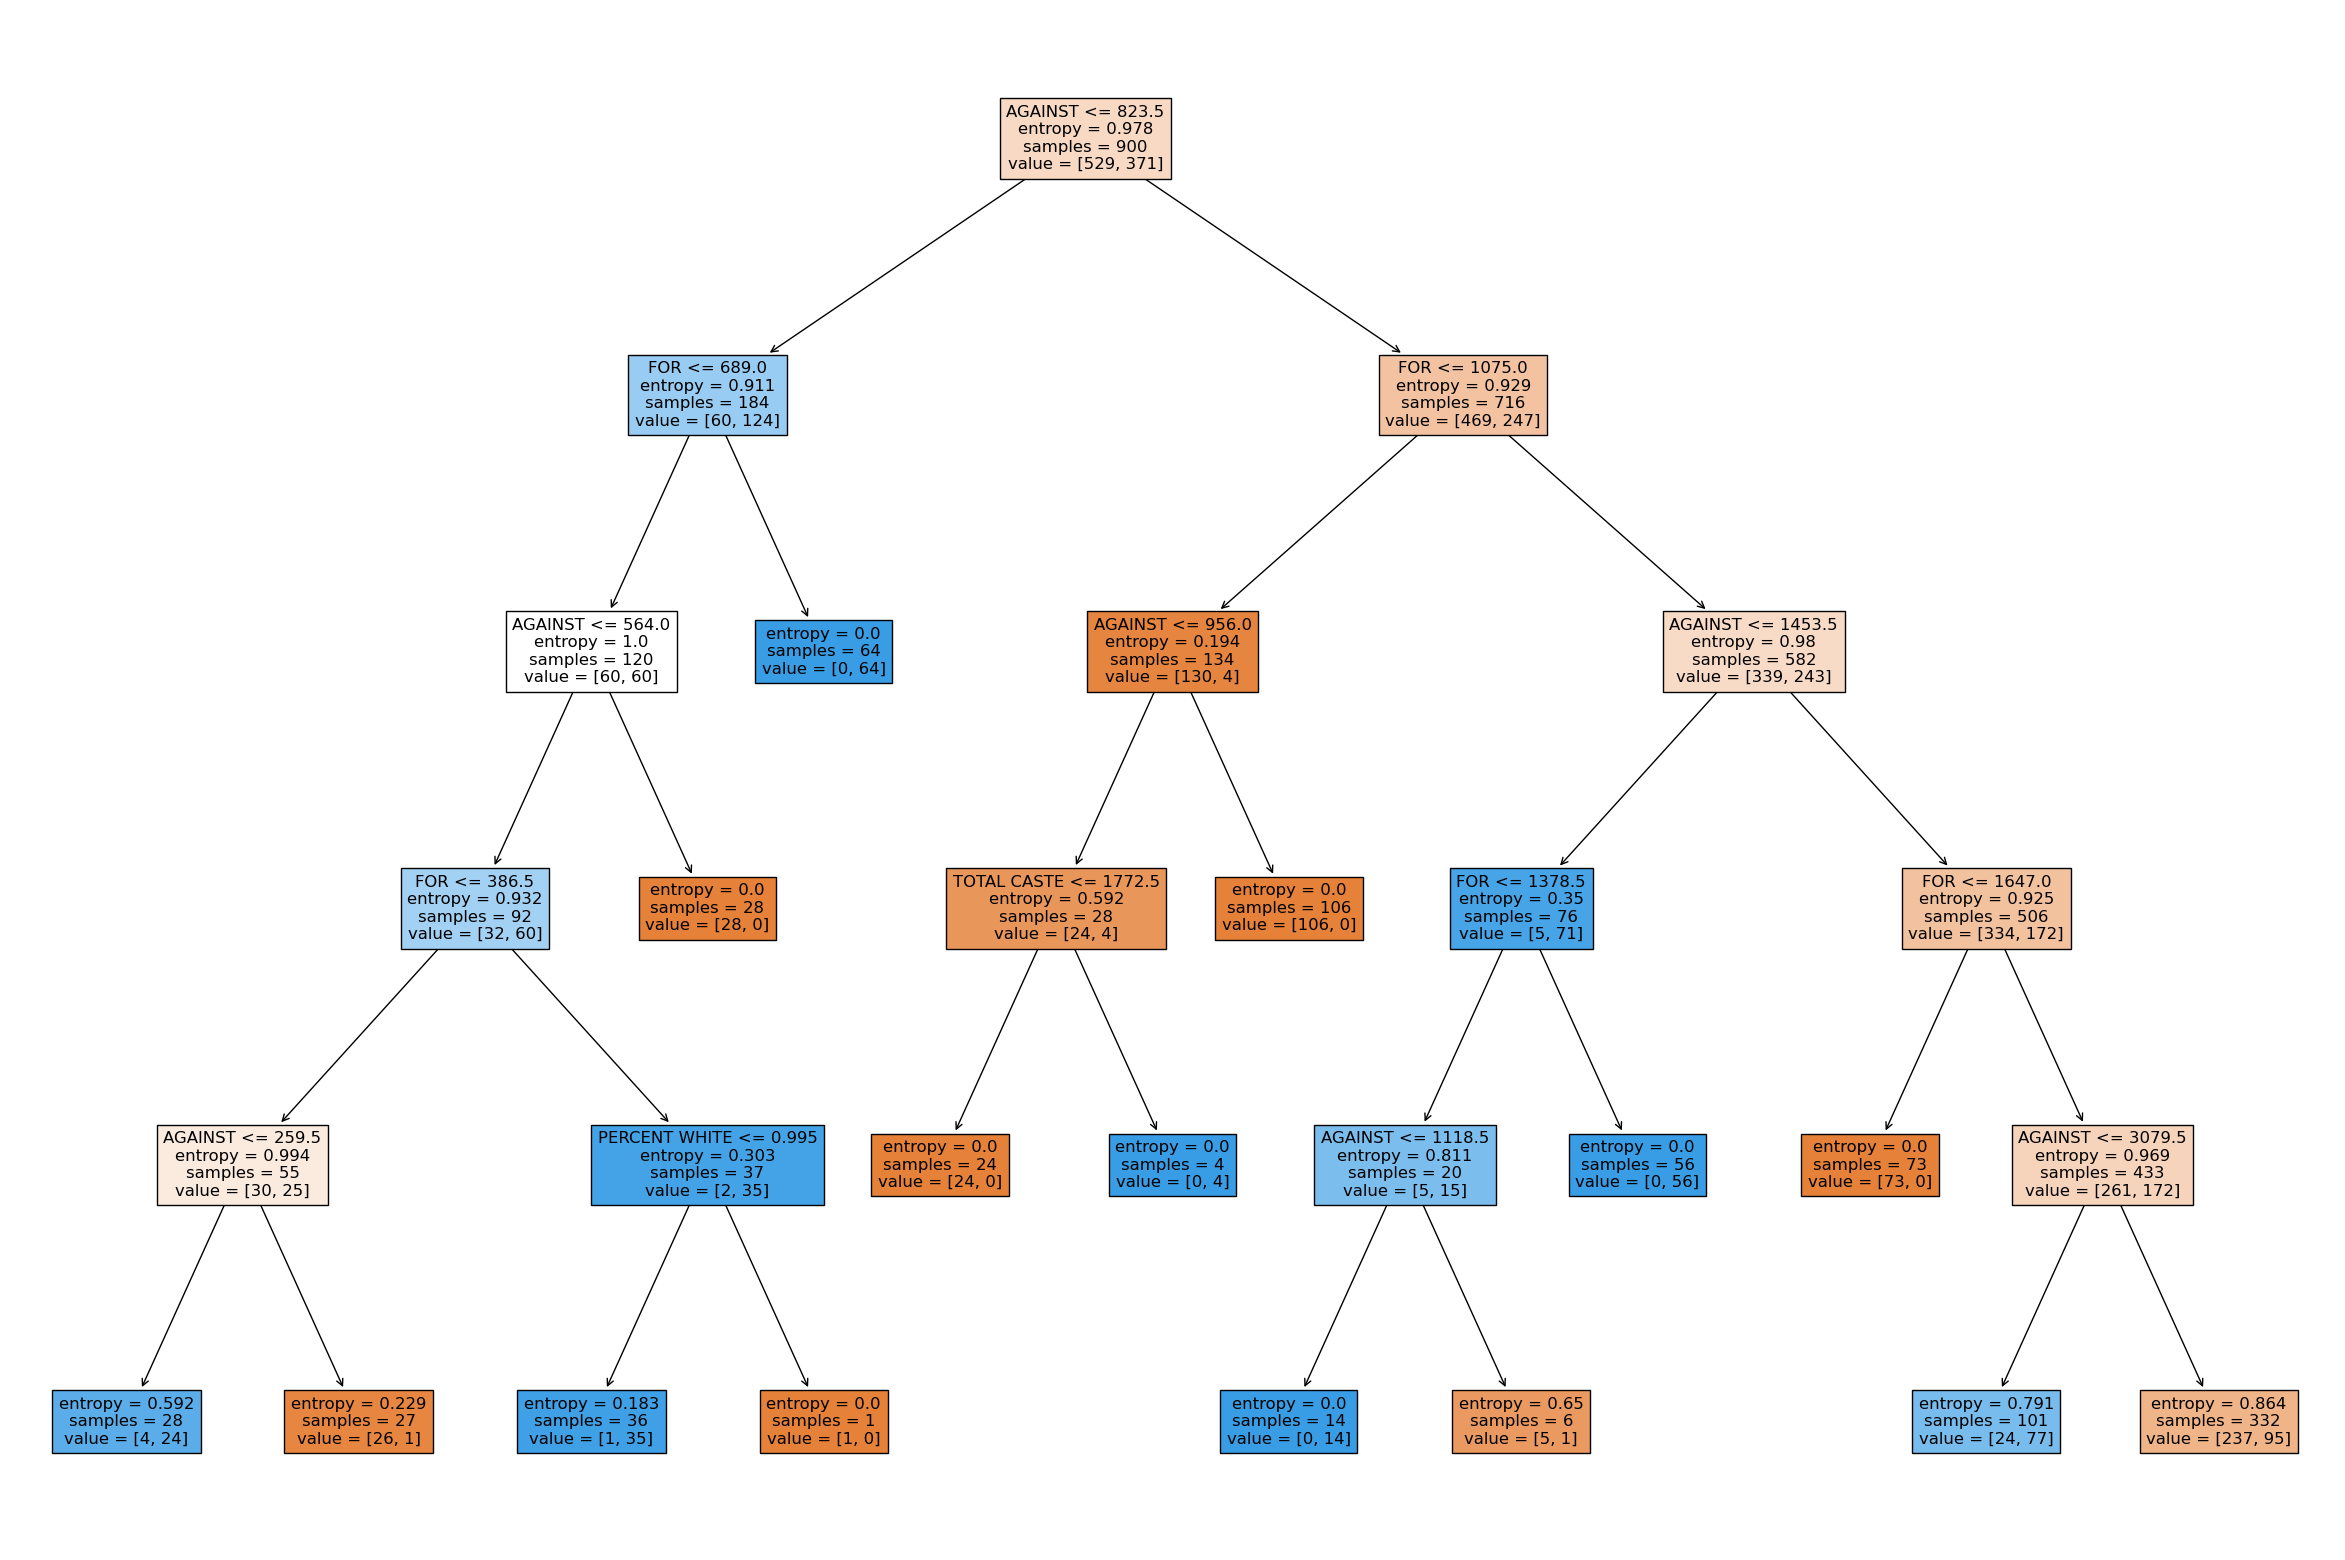

In [ ]:
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model,
               feature_names=list(x_train.columns),
               filled=True)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       210
           1       0.84      0.68      0.75       176

    accuracy                           0.80       386
   macro avg       0.81      0.79      0.79       386
weighted avg       0.80      0.80      0.79       386



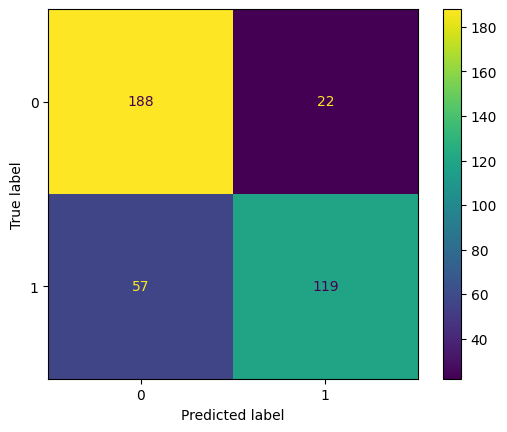

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
prediction_on_tests = model.predict(x_test)
cmdt = confusion_matrix(y_test, prediction_on_tests)
print(classification_report(y_test,prediction_on_tests))
ConfusionMatrixDisplay(confusion_matrix=cmdt, display_labels=model.classes_).plot()

So, by trial and test, we have came up with a decision tree with a max_depth = 5 since it had the accuracy of 80 which was highest of all the different max depth values.

## NAIVE BAYES

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       210
           1       0.84      0.65      0.73       176

    accuracy                           0.78       386
   macro avg       0.80      0.77      0.78       386
weighted avg       0.79      0.78      0.78       386



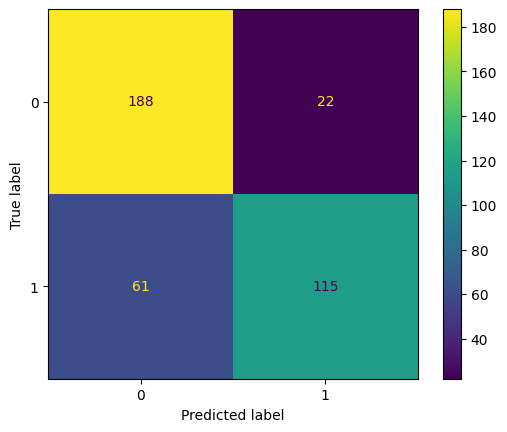

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
model_NB = MultinomialNB()
model_NB.fit(x_train, y_train)
prediction_on_test_NB = model_NB.predict(x_test)
prediction_on_train_NB = model_NB.predict(x_train)
cm_NB = confusion_matrix(y_test, prediction_on_test_NB)
cm_train_NB = confusion_matrix(y_train, prediction_on_train_NB)
ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=model_NB.classes_).plot()
print(classification_report(y_test, prediction_on_test_NB))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       529
           1       0.86      0.65      0.74       371

    accuracy                           0.81       900
   macro avg       0.82      0.79      0.80       900
weighted avg       0.82      0.81      0.81       900



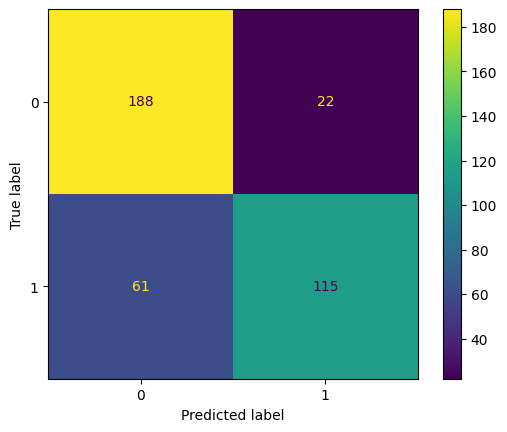

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=model_NB.classes_).plot()
print(classification_report(y_train, prediction_on_train_NB))

## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
for a in range(1,15):
    model2 = KNeighborsClassifier(n_neighbors = a)
    model2.fit(x_train,y_train)
    prediction_on_train = model2.predict(x_train)
    prediction_on_test = model2.predict(x_test)
    cmknn = confusion_matrix(y_test, prediction_on_test)
    #ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_).plot()
    print(" ")
    print(a)
    print(classification_report(y_test,prediction_on_test))


 
1
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       210
           1       0.80      0.80      0.80       176

    accuracy                           0.82       386
   macro avg       0.82      0.82      0.82       386
weighted avg       0.82      0.82      0.82       386

 
2
              precision    recall  f1-score   support

           0       0.70      0.92      0.80       210
           1       0.85      0.53      0.66       176

    accuracy                           0.75       386
   macro avg       0.78      0.73      0.73       386
weighted avg       0.77      0.75      0.73       386

 
3
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       210
           1       0.81      0.76      0.78       176

    accuracy                           0.81       386
   macro avg       0.81      0.80      0.81       386
weighted avg       0.81      0.81      0.81       386

 
4
   

KNN accuracy for the training dataset(below), testing dataset(above).

In [ ]:
print(classification_report(y_train,prediction_on_train))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       529
           1       0.85      0.65      0.74       371

    accuracy                           0.81       900
   macro avg       0.82      0.79      0.79       900
weighted avg       0.82      0.81      0.80       900



We will be running a loop to find the optimal value for the k, so that we can get the best accuracy of all.
Here, we can observe that k=3 has the best accuracy of all.

## K-FOLD Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import svm
kfold=KFold(n_splits=5, shuffle= True, random_state=42)
model=svm.SVC()
scores=cross_val_score(model, x, y, scoring="accuracy",cv=5)
print("Accuracy of Model with Cross Validation Scores: ",scores.mean()*100)

Accuracy of Model with Cross Validation Scores:  62.43839169909209


As mentioned in the problem statement, we have built a K fold cross validation with k=5 and have also checked the accuracy of it which was found to be 62.43

From the correlation matrix, we can conclude that, the attribute "PERCENT MINORITY"  is found to be the variable with the highest impact on the predictions, since it had the highest correlation score.

## COMPARISONS

Naive Bayes

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       210
           1       0.84      0.65      0.73       176

    accuracy                           0.78       386
   macro avg       0.80      0.77      0.78       386
weighted avg       0.79      0.78      0.78       386



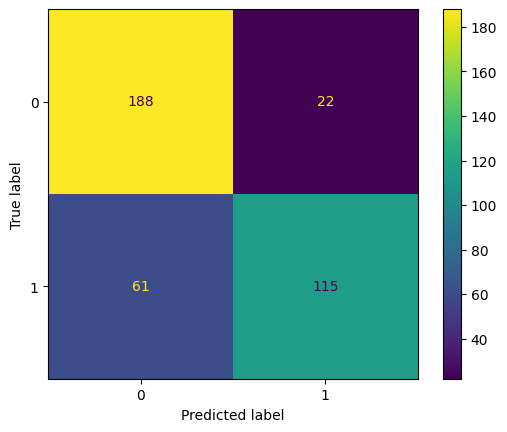

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=model_NB.classes_).plot()
print(classification_report(y_test, prediction_on_test_NB))

KNN

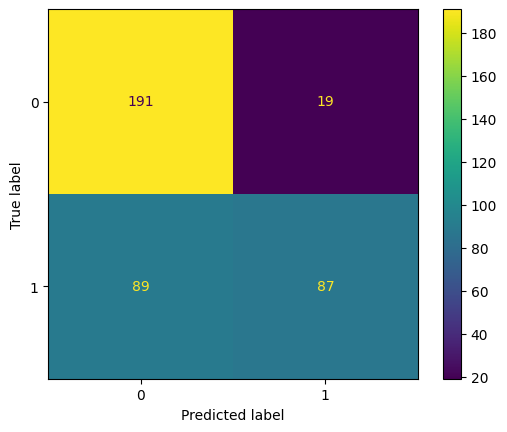

In [ ]:
cm = confusion_matrix(y_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cmknn, display_labels=model2.classes_).plot()

<b>Descision Tree Classifier:</b> Accuracy: 80 with max_depth 5 <br>
<b>Naive Bayes:</b> 78 <br>
<b>KNN:</b> Accuracy= 81 with k=3 <br>
<b>K-Fold Cross Validation:</b> Accuracy: 62.43

## CONCLUSIONS


The model is considered balanced because there isn't a significant discrepancy between the occurrences of the two values in the dependent variable, namely 0 and 1, which is 0:739 1:547 <br>

If the data were found to be imbalanced, there are two common approaches to address it. One method involves creating a sample variable for the value with fewer occurrences, while the other involves deleting some data from the value with more occurrences to achieve balance in the dependent variable.

The dataset contained a single row with null values, prompting us to remove it rather than impute missing data statistically. Once cleaned, we proceeded to visualize the various attributes to identify correlations between the dependent and independent variables. After discarding attributes with weak correlations to the dependent variable, we aimed to enhance model accuracy.<br><br>
**INDEPENDENT VARIABLES:** 'FOR', 'AGAINST', 'TOTAL CASTE', 'BALLOT TYPE', 'SIZE OF COUNTY', 'POPULATION DENSITY',
       'PERCENT WHITE', 'PERCENT BLACK', 'PERCENT OTHER', 'PERCENT MALE',
       'PERCENT FEMALE', 'NO OF CHURCHES', 'POVERTY LEVEL',
       'UNEMPLOYMENT RATE',  'MSA', 'PERCENT MINORITY', 'NO OF OLDER',
       'NO OF YOUNGER' <br>
**DEPENDENT VARIABLES:** 'DEPENDENT VARIABLE' <br>

We then constructed multiple machine learning models including Decision Trees, Naive Bayes, K-Nearest Neighbors (KNN), and K-fold Cross Validation. Each model yielded varying accuracy levels. Following a comparison of these accuracies, we arrived at different accuracy metrics for the specified models.<br>




<b>Descision Tree Classifier:</b> Accuracy: 80 with max_depth 5 <br>
<b>Naive Bayes:</b> 78 <br>
<b>KNN:</b> Accuracy= 81 with k=3 <br>
<b>K-Fold Cross Validation:</b> Accuracy: 62.43

Through comparison, it's evident that eliminating irrelevant attributes contributes to constructing models with higher accuracy, aiding in predictive capabilities. However, employing various models on the same dataset allows for accuracy comparison, facilitating the selection of the most accurate model among them.

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/DagaShloka.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/DagaShloka.ipynb to html
[NbConvertApp] Writing 2205121 bytes to /content/drive/MyDrive/Colab Notebooks/DagaShloka.html
